# Micro Credit Defaulter

In [98]:
#Including the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [99]:
#Data Description

In [100]:
Description=pd.read_excel("Micro credit Data_Description.xlsx",sheet_name = 'Description')
Description

,Variable,Definition
0,label,Flag indicating whether the user paid back the...
1,msisdn,mobile number of user
2,aon,age on cellular network in days
3,daily_decr30,"Daily amount spent from main account, averaged..."
4,daily_decr90,"Daily amount spent from main account, averaged..."
5,rental30,Average main account balance over last 30 days
6,rental90,Average main account balance over last 90 days
7,last_rech_date_ma,Number of days till last recharge of main account
8,last_rech_date_da,Number of days till last recharge of data account
9,last_rech_amt_ma,Amount of last recharge of main account (in In...


In [101]:
#Import Dataset
df=pd.read_csv("Micro credit dataset.csv",parse_dates=['pdate'],index_col=[0]) #Used un-named column as index
pd.set_option('display.max_columns', None)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [102]:
df.shape

(209593, 36)

In [103]:
#Object columns like "msidn" & "pdate" logically do not contribute & "pcircle" has constant value throughout. Hence can be dropped
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [104]:
df=df.drop(["msisdn","pcircle","pdate"],axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [106]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [107]:
#Cross check target data for number of categories
df["label"].unique()

array([0, 1], dtype=int64)

In [108]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [109]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


# EDA

In [110]:
#Univariate Analysis

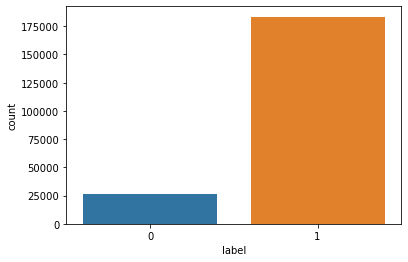

In [111]:
#Lets check the count in target variable.
sns.countplot(x="label",data=df)
plt.show()

In [112]:
#Pearsons Correlation 
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


In [113]:
#Bi vavriate analysis

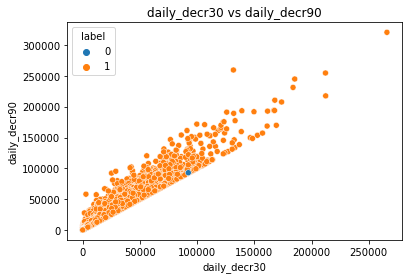

Variables have strong positive correletion


In [114]:
#Correlation between independent vaiables
plt.title("daily_decr30 vs daily_decr90")
sns.scatterplot(data=df,x="daily_decr30",y="daily_decr90",hue="label")
plt.show()
print("Variables have strong positive correletion")

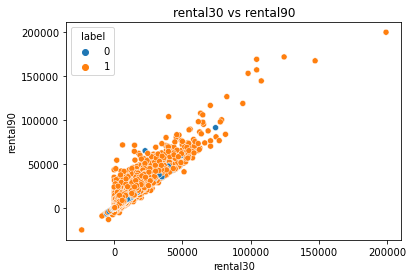

Variables have strong correlation


In [115]:
plt.title("rental30 vs rental90")
sns.scatterplot(data=df,x="rental30",y="rental90",hue="label")
plt.show()
print("Variables have strong correlation")

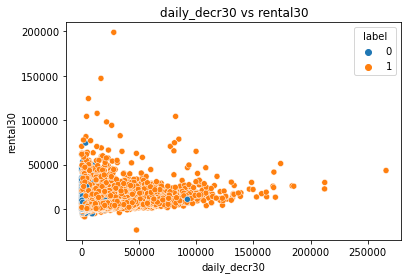

Variables have moderate positive correlation


In [116]:
plt.title("daily_decr30 vs rental30")
sns.scatterplot(data=df,x="daily_decr30",y="rental30",hue="label")
plt.show()
print("Variables have moderate positive correlation")

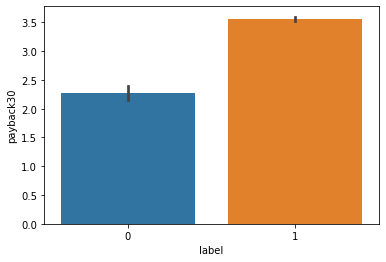

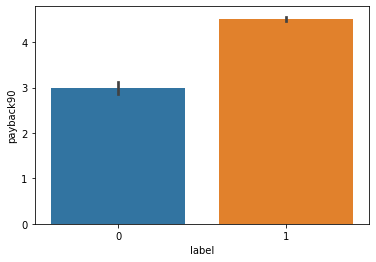

In [117]:
#Analysis Target vs Indeoendent variable
sns.barplot(y="payback30",x="label",data=df)
plt.show()
sns.barplot(y="payback90",x="label",data=df)
plt.show()
# average loan payback time is 3-4 days.

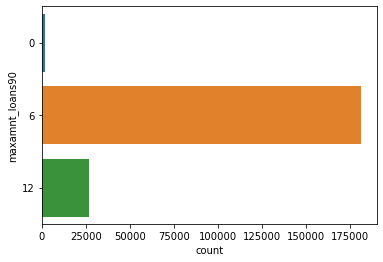

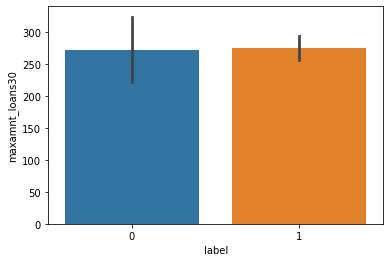

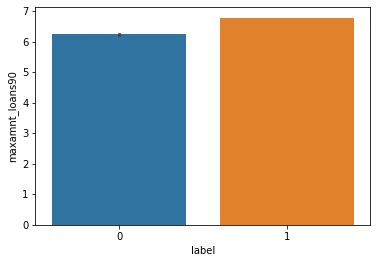

In [118]:
sns.countplot(y="maxamnt_loans90",data=df)
plt.show()
sns.barplot(y="maxamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="maxamnt_loans90",x="label",data=df)
plt.show()
#maximum amount of loan taken by each user in 90 days is 5 Rs for which they had to pay 6 Rs.
#we also see outliers present in maximum amount loan taken in 30 days. And 50% users took loan in 30 days.

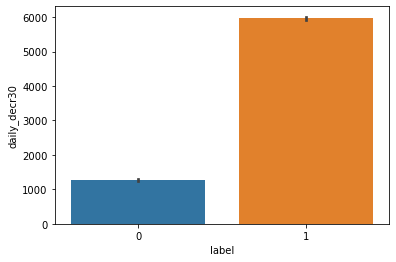

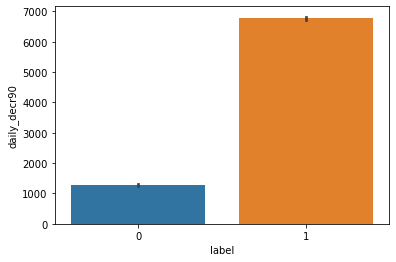

In [119]:
sns.barplot(y="daily_decr30",x="label",data=df)
plt.show()
sns.barplot(y="daily_decr90",x="label",data=df)
plt.show()
#non defaulters spent 6 times higher daily amount from main account within 30 days
#non defaulters spent 7 times higher daily amount from main account within 90 days

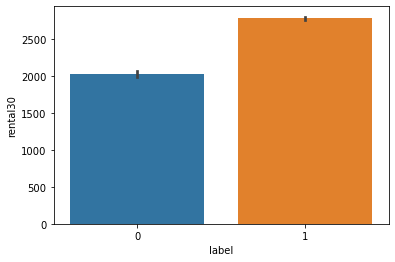

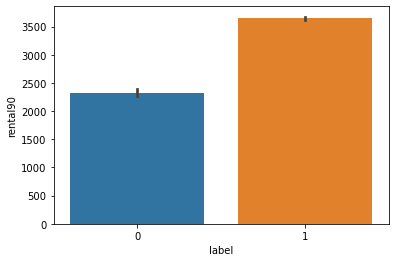

In [120]:
sns.barplot(y="rental30",x="label",data=df)
plt.show()
sns.barplot(y="rental90",x="label",data=df)
plt.show()
#Average main account balance is high for non defaulters

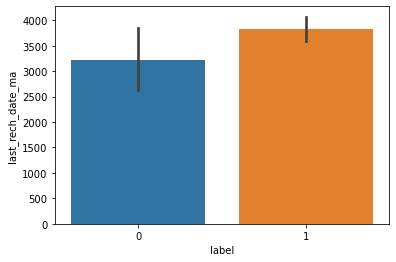

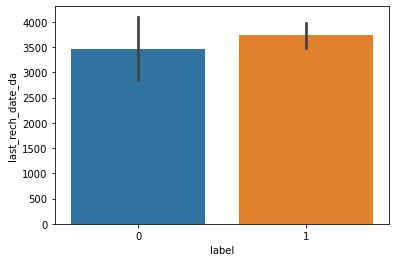

In [121]:
sns.barplot(y="last_rech_date_ma",x="label",data=df)
plt.show()
sns.barplot(y="last_rech_date_da",x="label",data=df)
plt.show()
#Number of days till last recharge of main account & data account is higher for non defaulters.
#outliers are present.

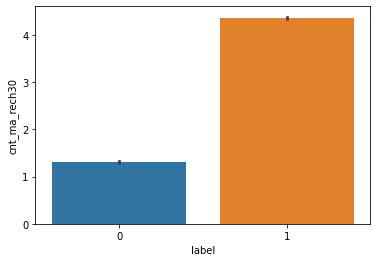

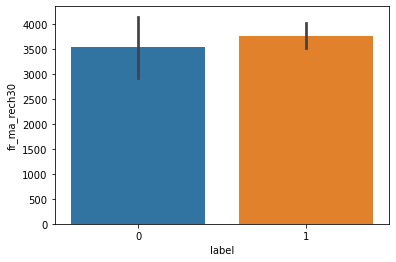

In [122]:
sns.barplot(y="cnt_ma_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_ma_rech30",x="label",data=df)
plt.show()
#Number of times main account got recharged is higher for non defaulters in last 30 days.
#Frequency of main account recharged in last 30 days is slight higher for non defaulter 
#& significant amount of outliers are present.

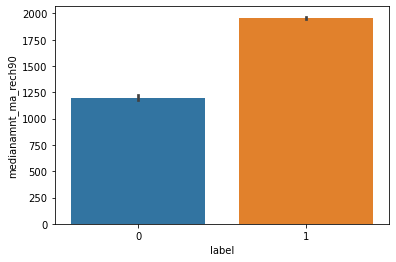

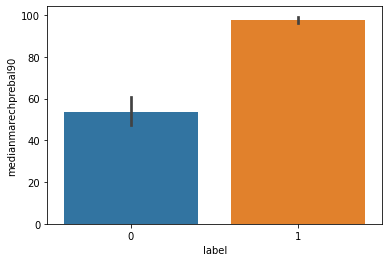

In [123]:
sns.barplot(y="medianamnt_ma_rech90",x="label",data=df)
plt.show()
sns.barplot(y="medianmarechprebal90",x="label",data=df)
plt.show()
#Median of main account balance just before recharge in last 90 is higher for non defaulters.
#we also see outliers present in Median of main account balance just before recharge.

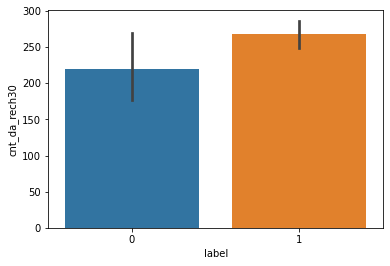

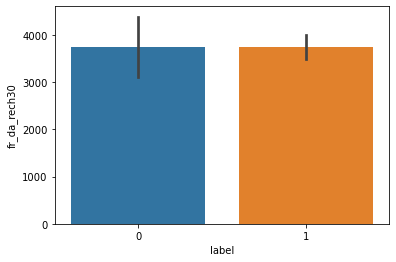

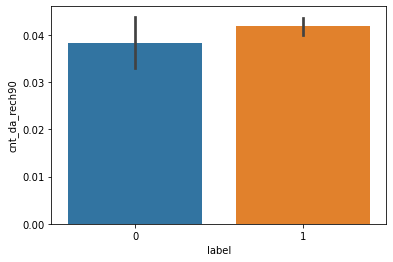

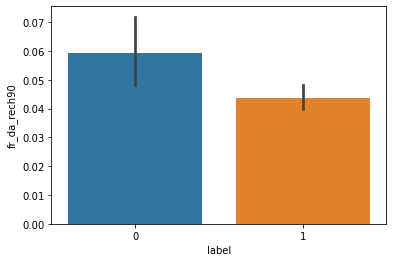

In [124]:
sns.barplot(y="cnt_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_da_rech90",x="label",data=df)
plt.show()
sns.barplot(y="fr_da_rech90",x="label",data=df)
plt.show()
#non defaulters recharged the data account more than defaulters in last 30 days.
#Frequency of data account recharged is almost same defaulters and non defaulters in last 30 days
#non defaulters recharged the data account more than defaulters in last 90 days.
#outliers are present

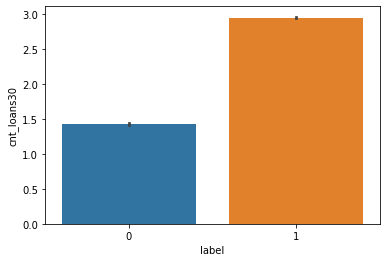

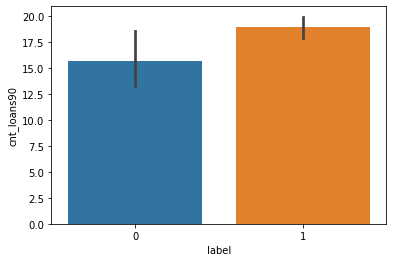

In [125]:
sns.barplot(y="cnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="cnt_loans90",x="label",data=df)
plt.show()
#Number of loans taken by user in last 30 & 90 days is higher for non defaulters.
#outliers are present in Number of loans taken by user in last 90 days


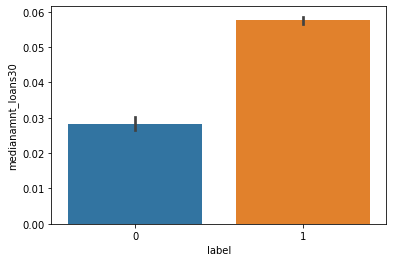

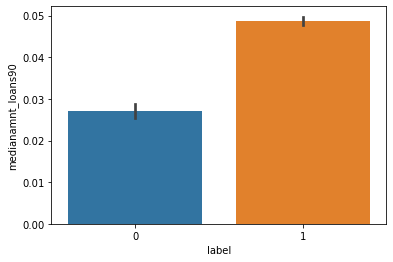

In [126]:
sns.barplot(y="medianamnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="medianamnt_loans90",x="label",data=df)
plt.show()
#Median of amounts of loan taken by the user in last 30 & 90 days is higher for non defaulters with outliers present.

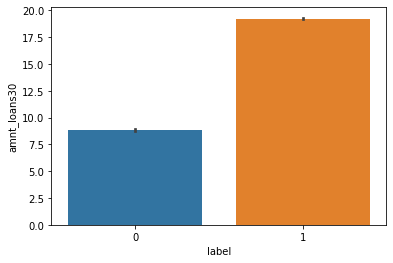

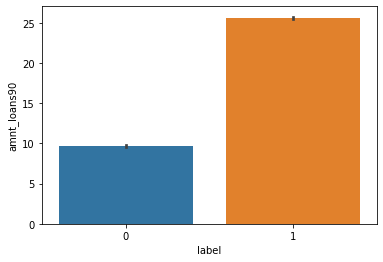

In [127]:
sns.barplot(y="amnt_loans30",x="label",data=df)
plt.show()
sns.barplot(y="amnt_loans90",x="label",data=df)
plt.show()
#Total amount of loans taken by user in last 30 & 90 days is higher for non defaulter.

# Data Preparation

In [128]:
#Exclude the datapoints where customer has not taken loan for 90days(No loan history), it doesnt contribute to output.
df=df[df["cnt_loans90"]>0]
df.shape

(207557, 33)

In [129]:
#Percentage data retained.
(207557/209593)*100
#99.02% data retained

99.02859351218791

In [130]:
# Age on network cannot be negative.
print(df["aon"].min())
print(df["aon"].max())

-48.0
999860.755167902


In [131]:
#Variable "aon" (age on network) logically cannot be negative.
df[df.aon<0]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
31,1,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.80,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.000000,6,6,1.0,0.0,0.0
198,1,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,0.0,1539.0,1539.0,4.87,1,0,1539,1539.0,4.87,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
323,1,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,16.0,943.0,471.5,12.30,2,16,943,471.5,12.30,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
505,1,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,0.0,770.0,770.0,8.40,1,0,770,770.0,8.40,0.0,0.0,0,0,1,6,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0
604,1,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,0.0,1539.0,1539.0,80.20,1,0,1539,1539.0,80.20,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208717,1,-34.0,19.260000,19.260000,714.15,714.15,1.000000,0.0,773,1,0.0,773.0,773.0,4.50,1,0,773,773.0,4.50,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
209122,1,-18.0,700.580000,700.600000,1057.72,1090.76,1.000000,0.0,770,1,0.0,770.0,770.0,25.00,1,0,770,770.0,25.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
209241,1,-28.0,10.640000,10.640000,133.35,133.35,1.000000,0.0,770,1,0.0,770.0,770.0,54.00,1,0,770,770.0,54.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0
209422,1,-44.0,7.166667,7.166667,368.55,368.55,1.000000,0.0,773,1,0.0,773.0,773.0,29.00,1,0,773,773.0,29.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0


In [132]:
#Considering usage of mobiles is from last 40 years not more. 40*365=14600
df[df.aon>14600]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
66,1,929670.835962,4130.729333,4151.880000,6139.79,6529.55,22.0,0.0,3178,1,0.0,3178.0,3178.0,541.00,2,18,6356,3178.0,271.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
158,1,860950.168106,19.396000,19.396000,78.12,78.12,3.0,0.0,770,3,2.0,1716.0,770.0,24.10,6,2,2235,173.0,38.10,0.0,0.0,0,0,2,12,6.0,0.5,2.0,12,6,0.5,3.0,3.0
309,1,697664.842824,4.388000,4.388000,1002.96,1002.96,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
488,1,640022.888780,3302.210667,3315.440000,84.00,90.00,14.0,0.0,11874,1,0.0,11874.0,11874.0,440.33,1,0,11874,11874.0,440.33,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0
582,1,872767.047840,242.000000,242.000000,0.00,0.00,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,12,12.0,2.0,1.0,12,12,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209023,1,504021.842848,3.026667,3.026667,567.36,567.36,1.0,0.0,5787,1,0.0,5787.0,5787.0,84.24,1,0,5787,5787.0,84.24,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.0
209156,1,959124.978632,13103.000000,17517.650000,12734.61,17410.82,16.0,0.0,4048,1,0.0,4048.0,4048.0,71.83,8,2,36713,4048.0,28.08,0.0,0.0,0,0,0,0,0.0,0.0,2.0,12,6,0.0,0.0,4.0
209328,1,803380.621830,18.821333,18.821333,98.24,98.24,5.0,0.0,1539,2,5.0,2312.0,1156.0,12.00,2,5,2312,1156.0,12.00,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,2.0,2.0
209440,0,581435.484230,2.666667,2.666667,10.00,10.00,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0


In [133]:
# Removing all the datapoints with values less than 0 and greater than 14600 since age cannot be negative
#and mobiles have been in operation for only 40 years at max
df=df[df["aon"]>0]
df=df[df["aon"]<14600]
df.shape

(203955, 33)

In [134]:
#Percentage data retained.
(203955/209593)*100
#97.31% data retained

97.31002466685433

In [135]:
#From Data Description:Only two loan amount available for customers are 5(with payback-6) & 10(with payback 12) 
#Refer column "maxamnt_loans30" & compare with "maxamnt_loans90", later has only datapoints 6 & 12.
df["maxamnt_loans30"].value_counts()

6.000000        175880
12.000000        25853
0.000000          1205
22061.221605         1
90459.114378         1
                 ...  
21935.072346         1
31162.008778         1
26462.333521         1
53666.885900         1
33184.650334         1
Name: maxamnt_loans30, Length: 1020, dtype: int64

In [136]:
#Column "daily_decr30" ie Daily amount spent from main account cannot be negative
df=df[df['daily_decr30'] >=0]
df.shape

(202144, 33)

In [137]:
#Percentage data retained.
(202144/209593)*100
#97.31% data retained

96.44596909247923

In [138]:
#Column "last_rech_date_da" ie last recharge in days cannot be zero
df=df[df["last_rech_date_da"]>=0]
df.shape

(202131, 33)

In [139]:
#Percentage data retained.
(202131/209593)*100
#96.43% data retained

96.43976659525842

In [140]:
df.shape

(202131, 33)

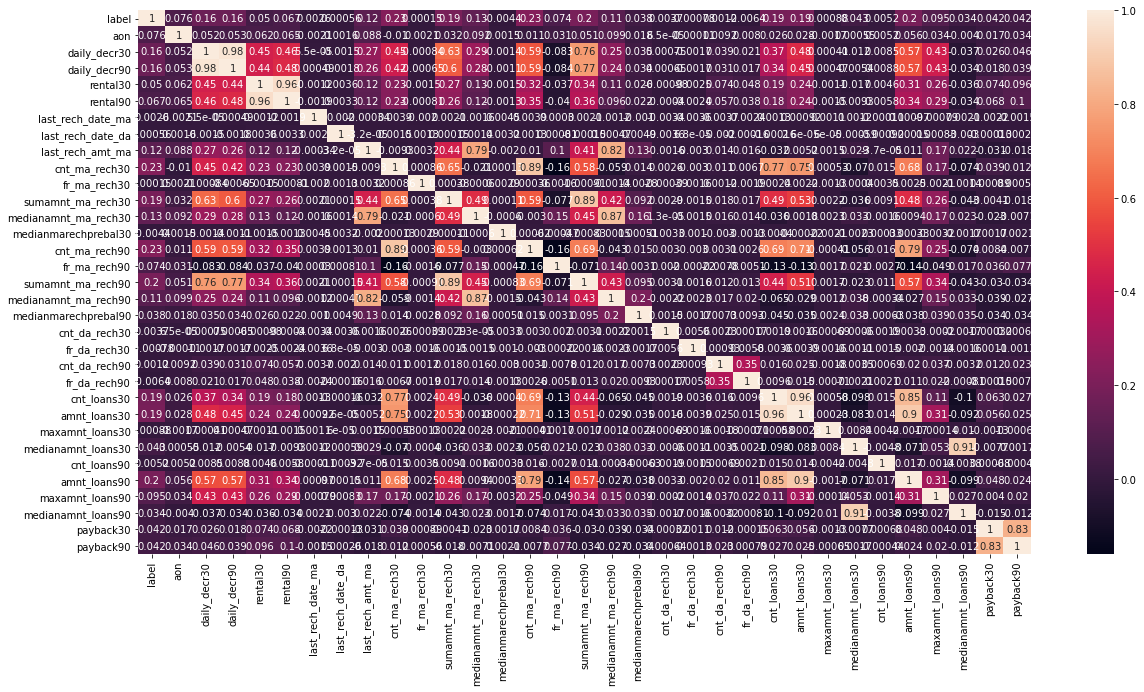

In [141]:
#Pearson Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()
#Correlation among target & independent variables is weak.

In [142]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

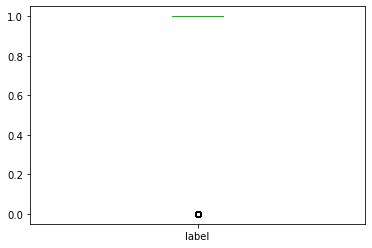

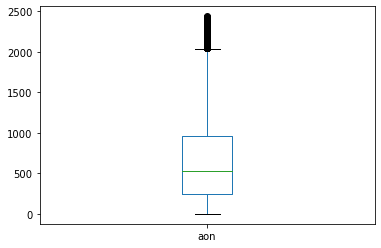

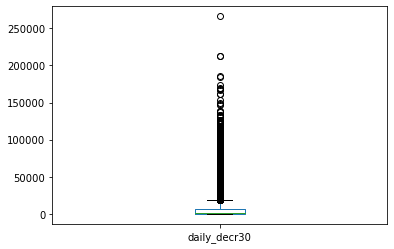

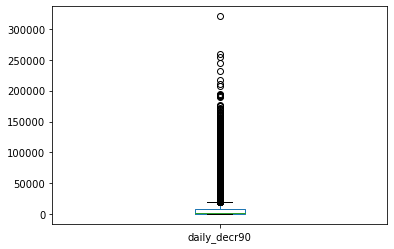

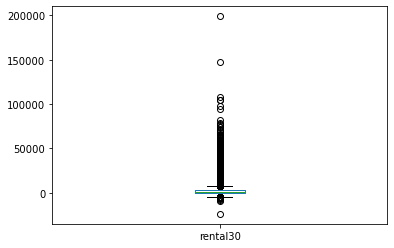

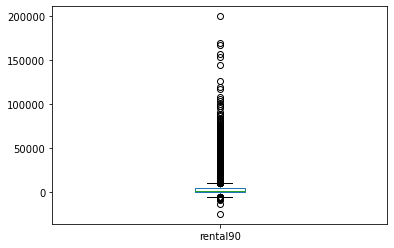

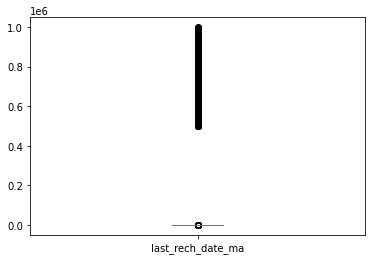

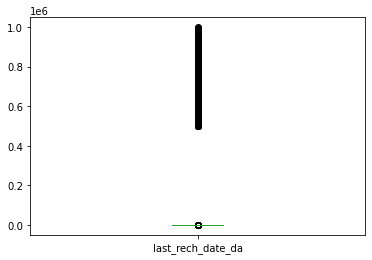

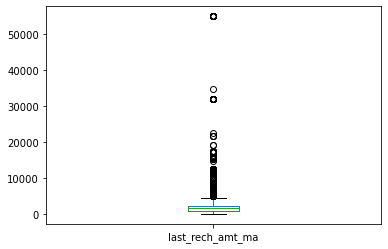

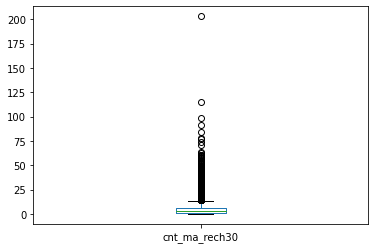

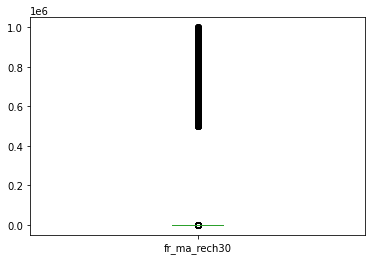

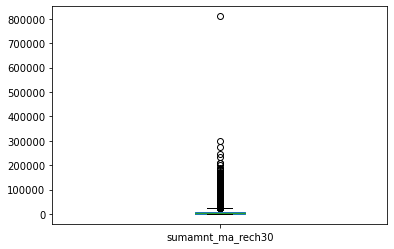

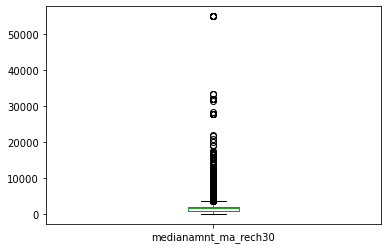

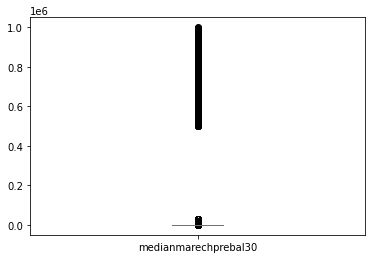

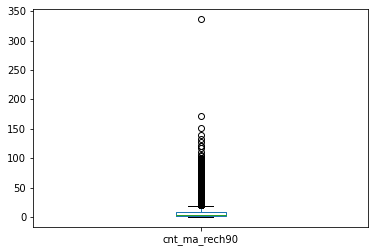

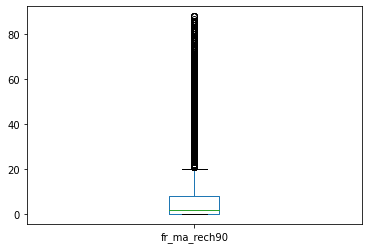

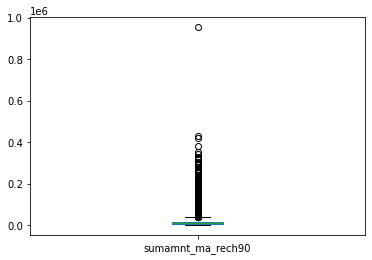

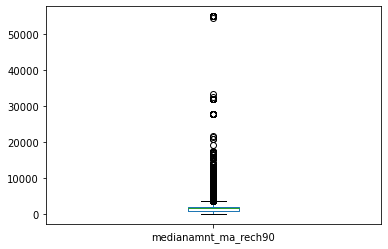

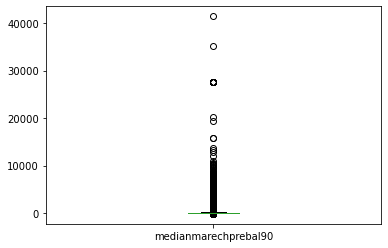

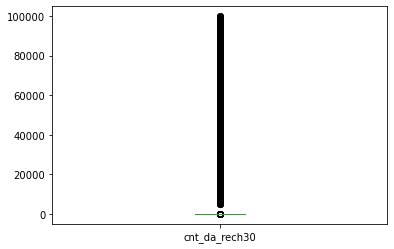

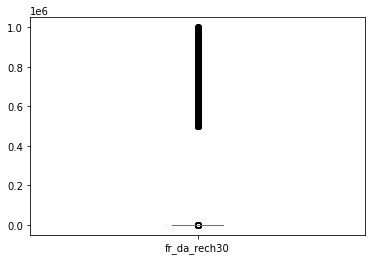

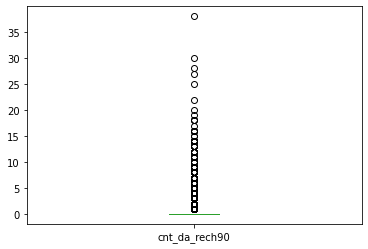

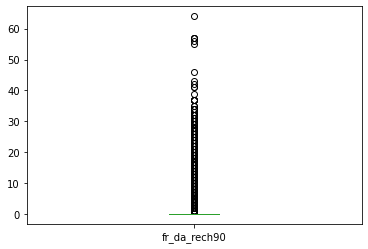

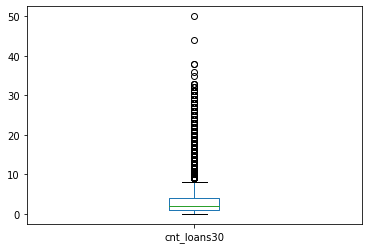

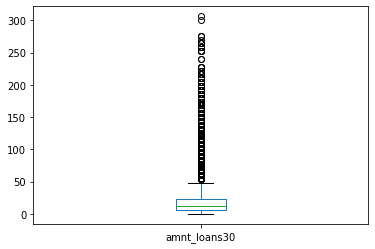

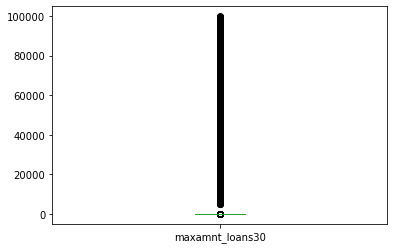

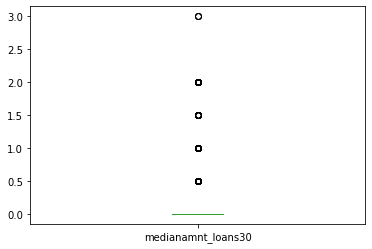

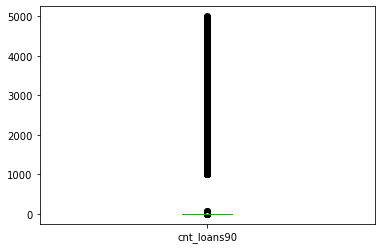

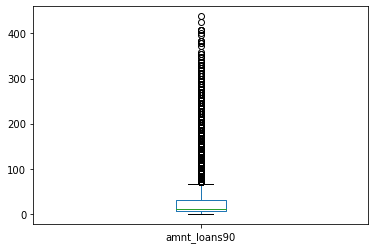

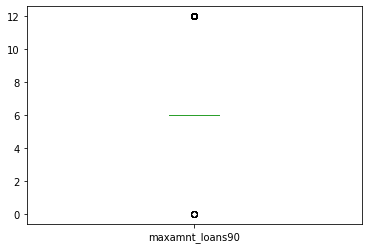

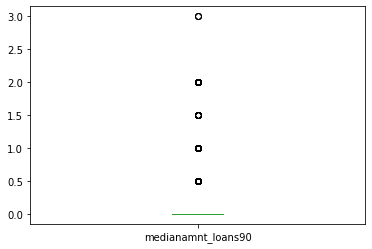

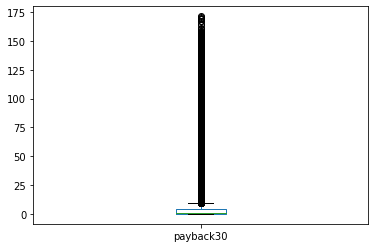

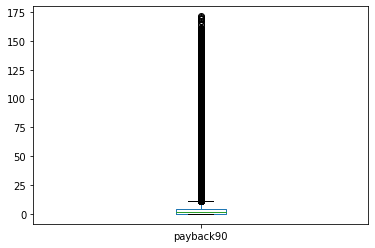

In [143]:
#Box Plot to check outliers
col=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in col:
    df[i].plot.box()
    plt.show()

In [144]:
# As per the above box plot, outliers are present in the data, hence removing using zscore
from scipy.stats import zscore
zscr=np.abs(zscore(df))
print(df.shape)
dfnew=df.loc[(zscr<3).all(axis=1)]
print(dfnew.shape)

(202131, 33)
(157865, 33)


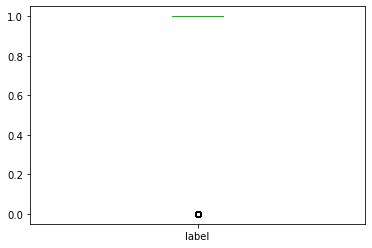

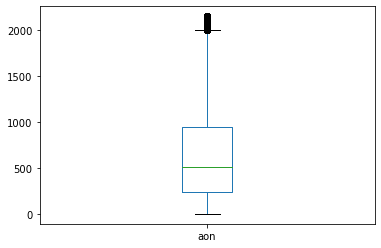

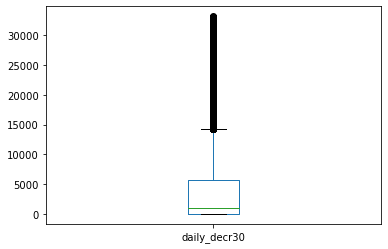

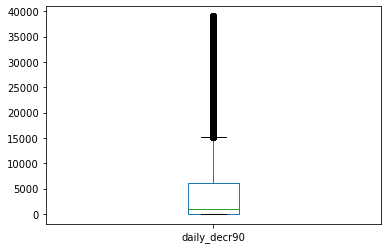

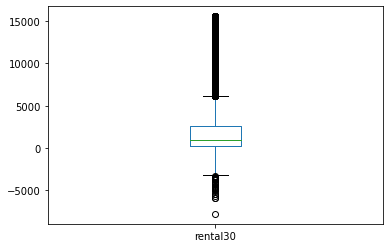

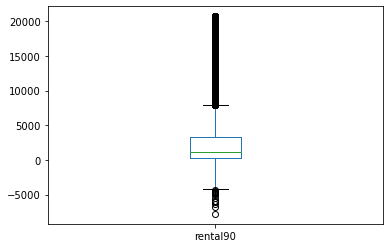

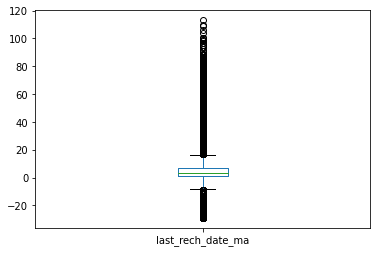

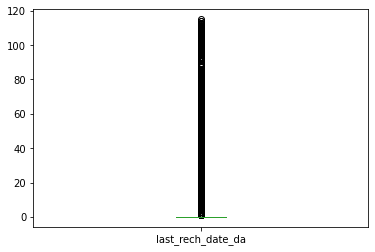

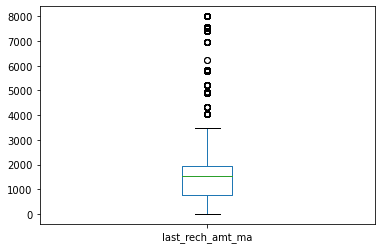

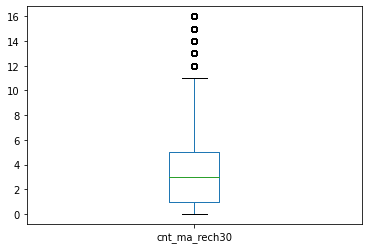

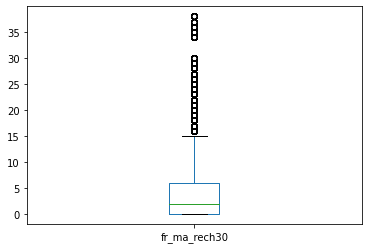

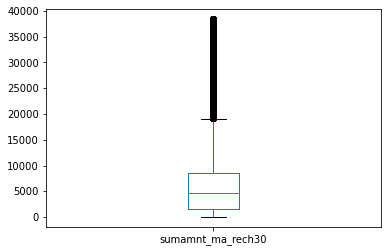

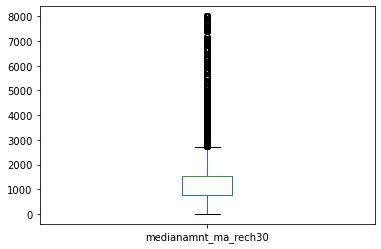

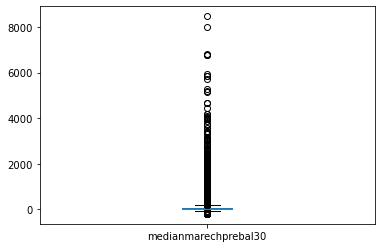

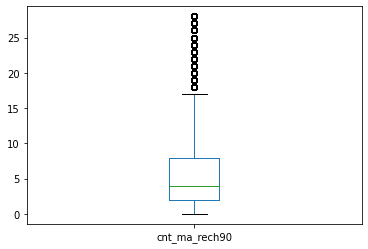

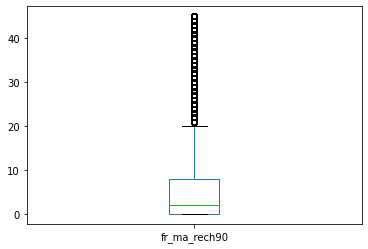

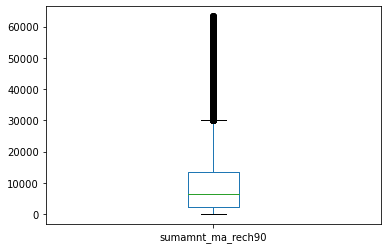

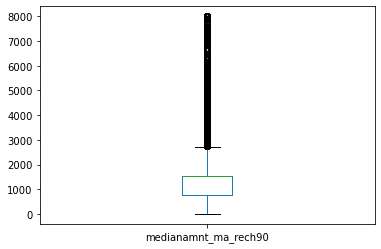

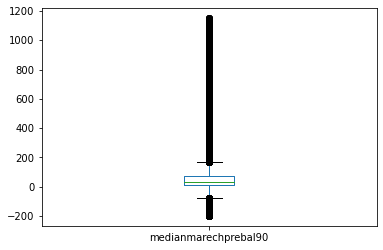

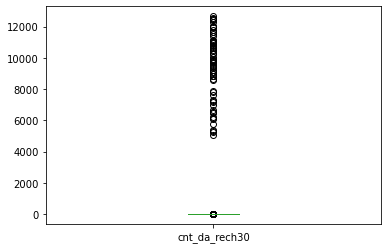

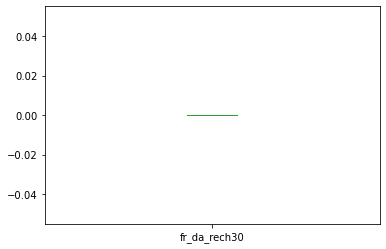

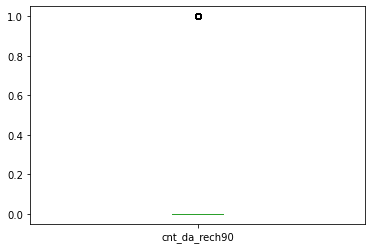

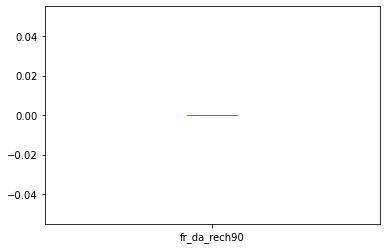

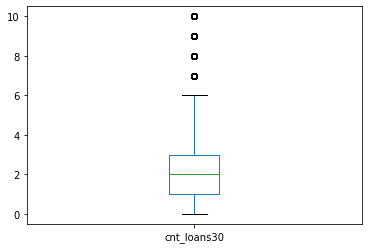

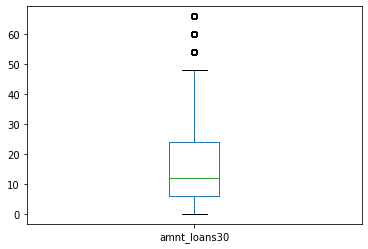

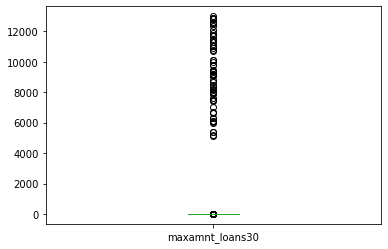

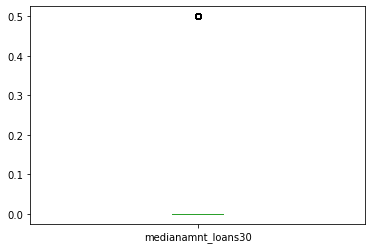

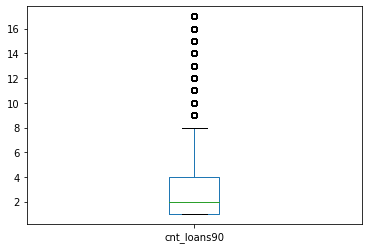

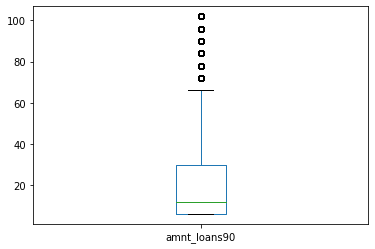

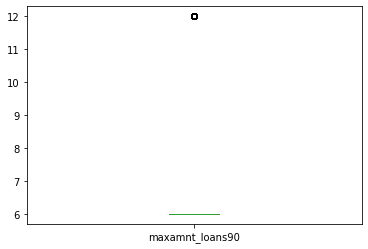

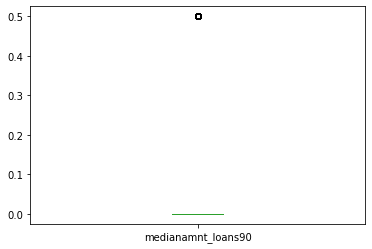

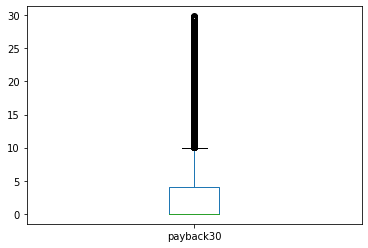

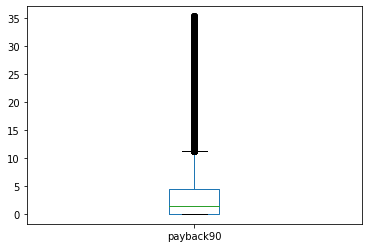

In [145]:
#Box Plot to check after removal of outliers.
col=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in col:
    dfnew[i].plot.box()
    plt.show()

<AxesSubplot:>

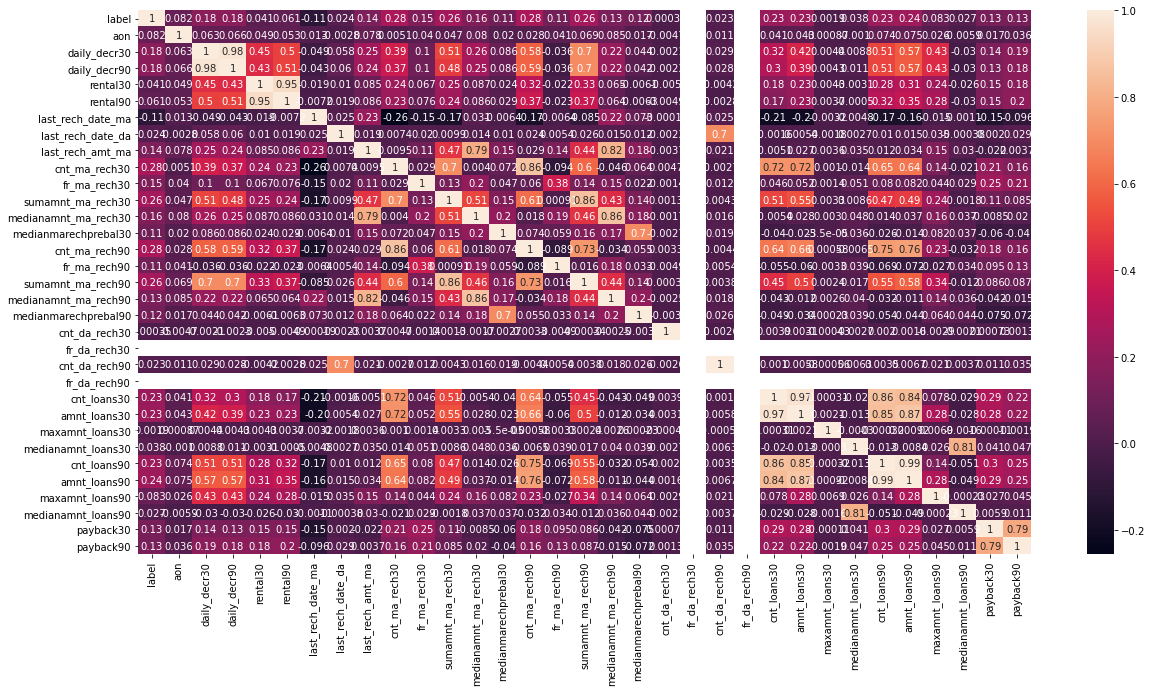

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(dfnew.corr(),annot=True)

In [147]:
#Check values counts in "fr_da_rech30"
df["fr_da_rech30"].value_counts()
#Due to large variance in data, majority of data lies as outlier. This variable is weakly correlated with target.

0.000000         200600
3.000000             62
1.000000             54
2.000000             51
7.000000             47
                  ...  
819231.556961         1
738055.326743         1
811998.243560         1
792892.884579         1
824343.802175         1
Name: fr_da_rech30, Length: 1032, dtype: int64

In [148]:
#Check values counts in "fr_da_rech90"
df["fr_da_rech90"].value_counts()
#Due to large variance in data, majority of data lies as outlier. This variable is weakly correlated with target.

0     201281
3         76
2         66
1         65
4         55
7         54
6         52
5         44
8         44
14        32
9         32
10        32
11        30
12        27
19        22
28        19
15        17
18        16
13        15
29        14
16        14
17        13
25        11
21        10
22        10
20         9
24         8
32         7
26         7
27         7
30         6
31         6
37         5
34         5
23         5
57         3
35         2
41         2
33         1
39         1
42         1
43         1
46         1
55         1
56         1
64         1
Name: fr_da_rech90, dtype: int64

In [149]:
#Drop columns
dfnew=dfnew.drop(["fr_da_rech30","fr_da_rech90"],axis=1)

In [150]:
dfnew.shape

(157865, 31)

In [151]:
#Seperate dependent & independent variable
x=dfnew.iloc[:,1:]
y=dfnew.iloc[:,:1]

In [152]:
print(x.shape)
print(y.shape)

(157865, 30)
(157865, 1)


In [153]:
y.value_counts() #Data imbalance

label
1        137404
0         20461
dtype: int64

In [154]:
# Dealing data imbalance with over sampling
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_res,y_res=sm.fit_sample(x,y.values.ravel())

In [155]:
print('After OverSampling, the shape of x: {}'.format(x_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of x: (274808, 30)
After OverSampling, the shape of y: (274808,) 

After OverSampling, counts of label '1': 137404
After OverSampling, counts of label '0': 137404


In [156]:
x_res

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.000000,3055.050000,3065.150000,220.130000,260.130000,2.000000,0.0,1539,2,21.000000,3078.000000,1539.0,7.500000,2,21,3078,1539.000000,7.500000,0.0,0,2,12,6.0,0.0,2.000000,12,6,0.0,29.000000,29.000000
1,712.000000,12122.000000,12124.750000,3691.260000,3691.260000,20.000000,0.0,5787,1,0.000000,5787.000000,5787.0,61.040000,1,0,5787,5787.000000,61.040000,0.0,0,1,12,12.0,0.0,1.000000,12,12,0.0,0.000000,0.000000
2,535.000000,1398.000000,1398.000000,900.130000,900.130000,3.000000,0.0,1539,1,0.000000,1539.000000,1539.0,66.320000,1,0,1539,1539.000000,66.320000,0.0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000
3,241.000000,21.228000,21.228000,159.420000,159.420000,41.000000,0.0,947,0,0.000000,0.000000,0.0,0.000000,1,0,947,947.000000,2.500000,0.0,0,2,12,6.0,0.0,2.000000,12,6,0.0,0.000000,0.000000
4,947.000000,150.619333,150.619333,1098.900000,1098.900000,4.000000,0.0,2309,7,2.000000,20029.000000,2309.0,29.000000,8,2,23496,2888.000000,35.000000,0.0,0,7,42,6.0,0.0,7.000000,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274803,716.280220,1593.173473,1604.066588,75.204128,127.329610,15.863169,0.0,770,1,1.732896,1437.165014,770.0,66.055955,4,2,3086,771.700328,60.003935,0.0,0,1,6,6.0,0.0,1.267104,7,6,0.0,0.000000,2.359417
274804,467.167888,1.181746,1.181746,61.680679,61.680679,0.000000,0.0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0.000000,0.000000,0.0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000
274805,857.053578,4.506564,4.506564,16.032503,16.032503,14.163864,0.0,773,1,0.000000,773.000000,773.0,17.874411,1,0,773,773.000000,17.874411,0.0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000
274806,126.786014,1000.071046,1000.101494,349.844513,778.584998,0.000000,0.0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0.000000,0.000000,0.0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000


In [157]:
y_res

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [158]:
y_res=y_res.reshape(-1,1)

In [159]:
y_res

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [160]:
#To get all the variables in same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_res=sc.fit_transform(x_res)
x_res.shape

(274808, 30)

# Check Best Random State

In [161]:
#Train-test split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=42,test_size=0.20)

In [162]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(219846, 30) (54962, 30)
(219846, 1) (54962, 1)


In [163]:

def maxacc_score(clf,df_x,y):
    maxa=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        if tmp>maxa:
            maxa=tmp
            rs=r_state
    print("Maximum accuracy_score is at random state :",rs," and it is :",maxa)

In [164]:
# Check Best Model

In [165]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
maxacc_score(lg_clf,x_res,y_res)

Maximum accuracy_score is at random state : 45  and it is : 0.8465303300462137


In [166]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
cv=cross_val_score(lg_clf,x_res,y_res,cv=5)
print("Mean Accuracy score for logistic classifier: ",cv.mean())
print(cv)

Mean Accuracy score for logistic classifier:  0.8425156114401033
[0.78226775 0.85726502 0.85786543 0.85782646 0.8573534 ]


In [167]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
maxacc_score(dt,x_res,y_res)

Maximum accuracy_score is at random state : 87  and it is : 0.8971653142170954


In [168]:
#Lets use cross_val_score and evaluate the Decision tree classifier
from sklearn.model_selection import cross_val_score
cv_dt=cross_val_score(dt,x_res,y_res,cv=5)
print("Mean Accuracy score for Decision tree classifier: ",cv_dt.mean())
print(cv_dt)

Mean Accuracy score for Decision tree classifier:  0.8898832717516891
[0.80360977 0.91286707 0.91102944 0.91097324 0.91093685]


In [169]:
#Naive Bayes Classifier- GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxacc_score(gnb,x_res,y_res)

Maximum accuracy_score is at random state : 64  and it is : 0.7314872093446381


In [170]:
#Lets use cross_val_score and evaluate the Decision tree classifier
from sklearn.model_selection import cross_val_score
cv_gnb=cross_val_score(gnb,x_res,y_res,cv=5)
print("Mean Accuracy score for Decision tree classifier: ",cv_gnb.mean())
print(cv_gnb)

Mean Accuracy score for Decision tree classifier:  0.7270312609354489
[0.71633128 0.72848514 0.72952222 0.73162788 0.72918979]


In [171]:
#Random forest classifier
#Check best value 
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=10)
maxacc_score(rf_clf,x_res,y_res)

Maximum accuracy_score is at random state : 77  and it is : 0.9299516029256577


In [172]:
#Evaluate Random forest classifier by cross validation
from sklearn.model_selection import cross_val_score
cv_rf=cross_val_score(rf_clf,x_res,y_res,cv=5)
print("Mean Accuracy score for Random forest classifier: ",cv_rf.mean())
print(cv_rf)

Mean Accuracy score for Random forest classifier:  0.923728722900998
[0.83719661 0.94558058 0.945526   0.94436055 0.94597988]


In [173]:
result=pd.DataFrame({'Model':["Logistic regresssion", "Decision Tree", "GaussianNB","Random Forest"],'Accuracy Score':[84.65,89.7,73.14,93.04],'Cross_Val_Score':[84.25,89.02,72.70,92.38]})
result

,Model,Accuracy Score,Cross_Val_Score
0,Logistic regresssion,84.65,84.25
1,Decision Tree,89.70,89.02
2,GaussianNB,73.14,72.70
3,Random Forest,93.04,92.38


In [174]:
result["Difference"]=result["Accuracy Score"]- result["Cross_Val_Score"]

In [175]:
result

,Model,Accuracy Score,Cross_Val_Score,Difference
0,Logistic regresssion,84.65,84.25,0.40
1,Decision Tree,89.70,89.02,0.68
2,GaussianNB,73.14,72.70,0.44
3,Random Forest,93.04,92.38,0.66


In [176]:
print(x_res.shape,y_res.shape)

(274808, 30) (274808, 1)


In [177]:
#Hyper parameter tuning of best model, by using solver="sag"
#At best random state=45
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=45,test_size=0.20)
lg=LogisticRegression(solver="sag")
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print("Accuracy_score =",ac)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))

Accuracy_score = 0.8374695243986755
Confusion matrix 
 [[23997  3555]
 [ 5378 22032]]
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     27552
           1       0.86      0.80      0.83     27410

    accuracy                           0.84     54962
   macro avg       0.84      0.84      0.84     54962
weighted avg       0.84      0.84      0.84     54962



In [178]:
#Hyper parameter tuning of best model, by using solver="lbfgs"
#At best random state=45
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=45,test_size=0.20)
lg=LogisticRegression(solver="lbfgs")
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print("Accuracy_score =",ac)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))

Accuracy_score = 0.8440013099959972
Confusion matrix 
 [[24137  3415]
 [ 5159 22251]]
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     27552
           1       0.87      0.81      0.84     27410

    accuracy                           0.84     54962
   macro avg       0.85      0.84      0.84     54962
weighted avg       0.85      0.84      0.84     54962



In [180]:
x_test.shape

(54962, 30)

In [185]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,-1]
print("Prediction Probablity:\n",y_pred_prob)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print("False Positive rate:\n",fpr)
print("True Positive Rate:\n",tpr)
print("Thresholds:\n",thresholds)

Prediction Probablity:
 [0.49509678 0.28467876 1.         ... 0.5076898  0.30477056 0.46363014]
False Positive rate:
 [0.        0.        0.        ... 0.8481417 0.8481417 1.       ]
True Positive Rate:
 [0.         0.00707771 0.00788034 ... 0.99996352 1.         1.        ]
Thresholds:
 [2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 8.59618926e-03
 8.58422561e-03 2.85981852e-08]


<function matplotlib.pyplot.show(close=None, block=None)>

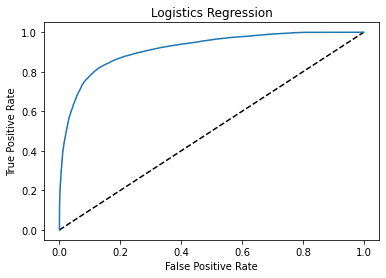

In [186]:
#ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistics Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistics Regression")
plt.show

In [187]:
#Saving the best model
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg,'Micro_Credit_Defaulter.joblib')

['Micro_Credit_Defaulter.joblib']